In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
! python --version

Python 3.6.5 :: Anaconda, Inc.


In [3]:
data = pd.read_csv('./data.csv')

In [4]:
data.shape

(378661, 15)

In [7]:
data.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00


In [8]:
data.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

### Splitting the dataset

In [9]:
# Splitting features and labels

X_data, Y_data = data.loc[:,data.columns != 'state'], data.loc[:,data.columns == 'state']

In [10]:
# Splitting train test and validation data

traindata_X, test_X, traindata_Y,test_Y = train_test_split(X_data, Y_data, test_size = .10, random_state = 7)
train_X, val_X, train_Y, val_Y = train_test_split(traindata_X, traindata_Y, test_size = .20, random_state = 7)

In [11]:
print(train_X.shape, train_Y.shape)
print(val_X.shape, val_Y.shape)
print(test_X.shape, test_Y.shape)

(272635, 14) (272635, 1)
(68159, 14) (68159, 1)
(37867, 14) (37867, 1)


### Exploratory Analysis of the dataset

In [12]:
train_Y.state.value_counts()

failed        142407
successful     96346
canceled       27923
undefined       2580
live            2027
suspended       1352
Name: state, dtype: int64

<b> Here I need to predict whether a project would be successful or not. So I'll consider all states other than successful to be failed. So it becomes a binary classification problem. </b>

In [13]:
# Converting labels to binary labels for all the datasets

train_Y = train_Y.state.replace(['canceled','undefined','live','suspended'],'failed').to_frame()
val_Y = val_Y.state.replace(['canceled','undefined','live','suspended'],'failed').to_frame()
test_Y = test_Y.state.replace(['canceled','undefined','live','suspended'],'failed').to_frame()

In [14]:
train_Y.state.value_counts()

failed        176289
successful     96346
Name: state, dtype: int64

In [15]:
train_X.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real
359919,903624360,Slangster - Global Slang Converter (Canceled),Apps,Technology,USD,2016-04-23,50000.0,2016-03-24 16:29:13,0.0,0,US,0.00,0.00,50000.00
318366,691611007,"House of Wax, scented wax dipped stuffed anima...",Crafts,Crafts,USD,2015-02-09,1200.0,2015-01-13 05:08:35,0.0,0,US,0.00,0.00,1200.00
370448,957512628,ZDS : Zombie Defense Simulation,Video Games,Games,USD,2015-12-18,300.0,2015-11-18 01:25:02,89.0,16,US,89.00,89.00,300.00
154340,1784679909,EDC Snowflake Spinner,Textiles,Art,CAD,2017-04-09,3000.0,2017-03-10 21:59:41,161.0,3,CA,233.40,121.65,2266.72
263982,412532783,Bowery & Fourth - Business wear for the Urban ...,Ready-to-wear,Fashion,DKK,2015-12-11,100000.0,2015-10-28 14:42:56,107165.0,106,DK,15882.14,15728.10,14676.53


In [16]:
train_X.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
backers                0
country                0
usd pledged         2741
usd_pledged_real       0
usd_goal_real          0
dtype: int64

There are a lot of projects that haven't pledged in USD and the usd_pledged doesn't provide conversion for all entries. So it makes sense to just use usd_pledged_real instead of usd_pledged for our analysis.<br>
Similarly, different projects have goal amount in different currencies, so it makes sense to use usd_goal_real to compare the goal in a common currency for all the projects.

In [19]:
# This is used later
all_successful = train_X.loc[train_Y.state == 'successful']

##### Main Category Analysis

In [20]:
main_categ = train_X.main_category.value_counts()

In [21]:
main_categ

Film & Video    45703
Music           37640
Publishing      28609
Games           25400
Technology      23501
Design          21525
Art             20199
Food            17743
Fashion         16440
Comics           7820
Theater          7815
Photography      7766
Crafts           6277
Journalism       3461
Dance            2736
Name: main_category, dtype: int64

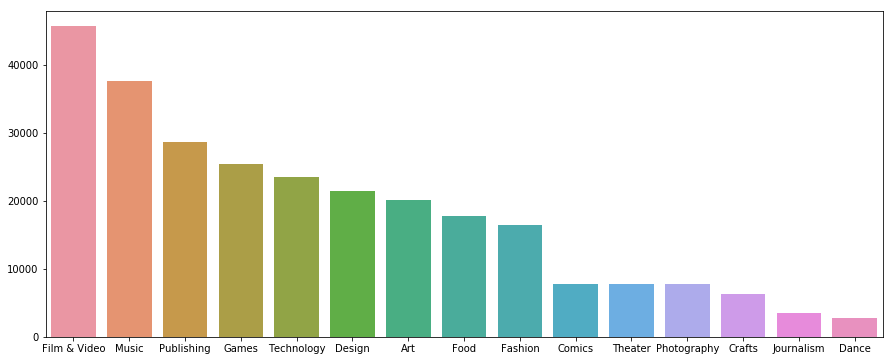

In [22]:
plt.figure(figsize = (15,6))
sns.barplot(main_categ.keys(),main_categ.values)

In [23]:
train_X.main_category.describe()

count           272635
unique              15
top       Film & Video
freq             45703
Name: main_category, dtype: object

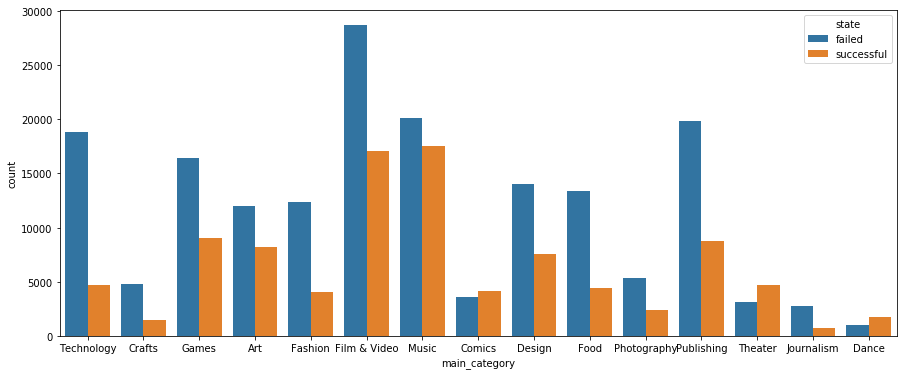

In [24]:
plt.figure(figsize = (15,6))
sns.countplot(x = train_X.main_category, hue = train_Y.state)

- The chances of success is higher when the project belongs to Music or Film & Video category
- Comics, Dance and Theatre have more successful projects than failed projects
- Journalism barely has any success at all

In [25]:
# Count no. of project IDs with success
groupwise_success_count = all_successful.groupby('main_category')['ID'].count()

In [26]:
groupwise_total_count = train_X.groupby('main_category')['ID'].count()

In [27]:
categ_success_rate = groupwise_success_count/groupwise_total_count*100

In [28]:
categ_success_rate

main_category
Art             40.739641
Comics          53.529412
Crafts          23.753385
Dance           62.426901
Design          35.024390
Fashion         24.641119
Film & Video    37.255760
Food            24.680156
Games           35.480315
Journalism      21.092170
Music           46.461211
Photography     30.839557
Publishing      30.637212
Technology      19.918301
Theater         59.692898
Name: ID, dtype: float64

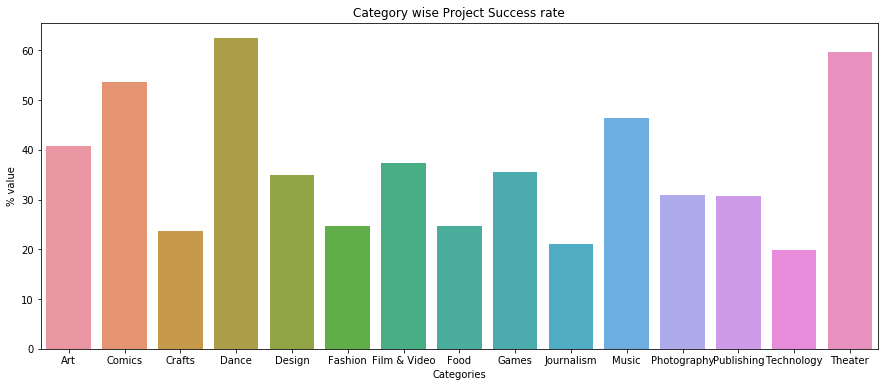

In [29]:
plt.figure(figsize = (15,6))
plt.title('Category wise Project Success rate')
sns.barplot(x = categ_success_rate.keys(), y = categ_success_rate.values)
plt.xlabel('Categories')
plt.ylabel('% value')
plt.show()

- Here we can see that Dance and Theatre have the highest success rates even though they have lower number of projects.
- So category is an important feature for feeding in to our model

##### Currency Analysis

In [30]:
currency_counts = train_X.currency.value_counts()

In [31]:
currency_counts

USD    212625
GBP     24600
EUR     12432
CAD     10894
AUD      5722
SEK      1305
MXN      1248
NZD      1083
DKK       792
CHF       546
NOK       525
HKD       438
SGD       393
JPY        32
Name: currency, dtype: int64

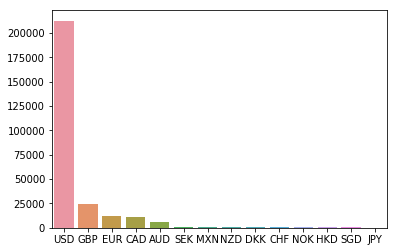

In [32]:
sns.barplot(currency_counts.keys(),currency_counts.values)

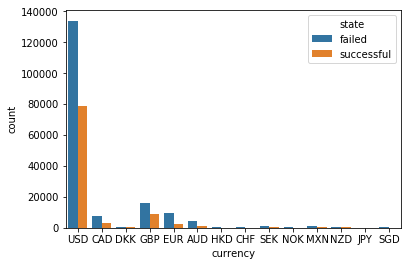

In [33]:
sns.countplot(x = train_X.currency, hue = train_Y.state)

- Since most of the projects are pledged in USD, the chances of success are higher when projects use USD

In [34]:
groupwise_currency_success = all_successful.groupby('currency')['ID'].count()

In [35]:
groupwise_currency_all = train_X.groupby('currency')['ID'].count()

In [36]:
currency_success_rate = groupwise_currency_success/groupwise_currency_all * 100

In [37]:
currency_success_rate

currency
AUD    25.026215
CAD    27.730861
CHF    24.542125
DKK    31.565657
EUR    22.192728
GBP    35.325203
HKD    33.561644
JPY    18.750000
MXN    22.115385
NOK    22.857143
NZD    29.547553
SEK    28.122605
SGD    32.315522
USD    37.012111
Name: ID, dtype: float64

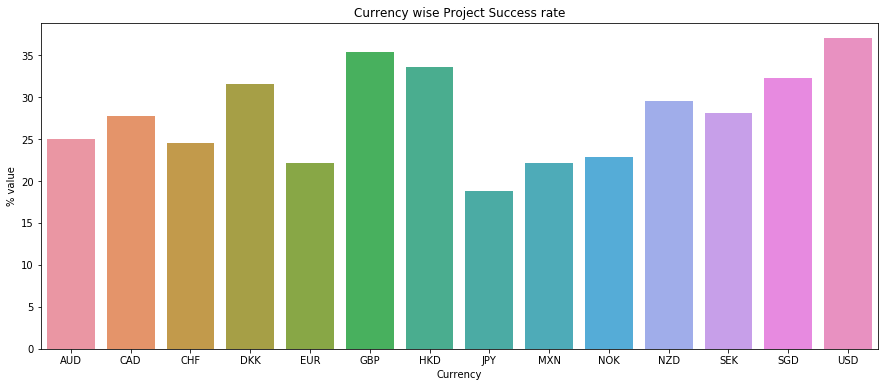

In [38]:
plt.figure(figsize = (15,6))
plt.title('Currency wise Project Success rate')
sns.barplot(x = currency_success_rate.keys(), y = currency_success_rate.values)
plt.xlabel('Currency')
plt.ylabel('% value')
plt.show()

- Here we can see that all the currencies have approximately close success rate, ranging between 20 and 38% approx. 

##### Country Analysis

In [39]:
country_counts = train_X.country.value_counts()

In [40]:
country_counts

US      210664
GB       24265
CA       10741
AU        5643
DE        2971
N,0"      2741
IT        2079
FR        2076
NL        2067
ES        1610
SE        1282
MX        1248
NZ        1060
DK         784
IE         562
CH         541
NO         513
BE         451
HK         438
AT         423
SG         393
LU          51
JP          32
Name: country, dtype: int64

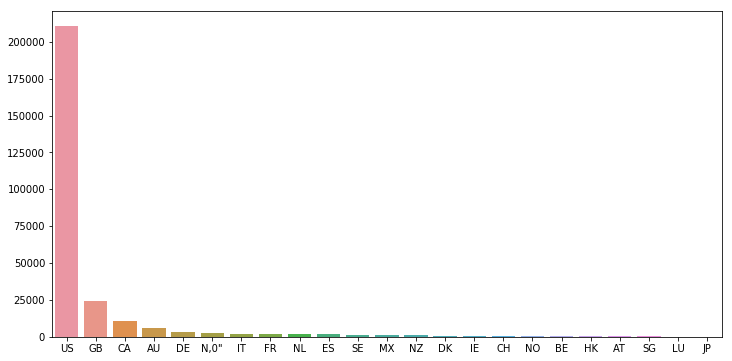

In [41]:
plt.figure(figsize = (12,6))
sns.barplot(country_counts.keys(),country_counts.values)

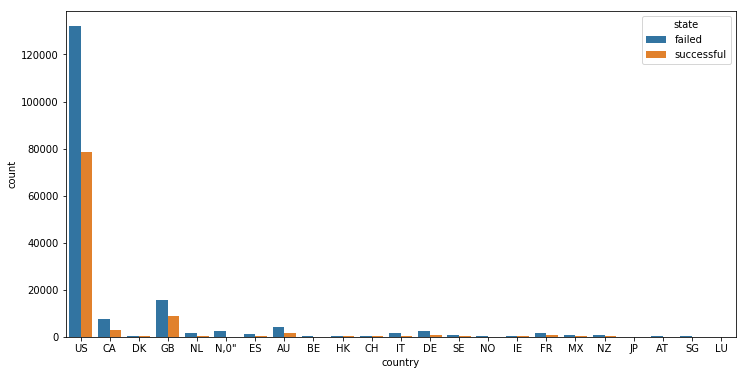

In [42]:
plt.figure(figsize = (12,6))
sns.countplot(x=train_X.country, hue = train_Y.state)

- Again, as most of the projects are undertaken in US, the success rate is obviously higher for projects in US

In [43]:
groupwise_country_success = all_successful.groupby('country')['ID'].count()

In [44]:
groupwise_country_all = train_X.groupby('country')['ID'].count()

In [45]:
country_success_rate = groupwise_country_success/groupwise_country_all*100

In [46]:
country_success_rate

country
AT      20.330969
AU      25.376573
BE      24.833703
CA      28.116563
CH      24.768946
DE      22.046449
DK      31.887755
ES      21.925466
FR      30.587669
GB      35.779930
HK      33.561644
IE      24.555160
IT      15.680616
JP      18.750000
LU      27.450980
MX      22.115385
N,0"     2.626779
NL      21.093372
NO      23.196881
NZ      30.188679
SE      28.627145
SG      32.315522
US      37.329112
Name: ID, dtype: float64

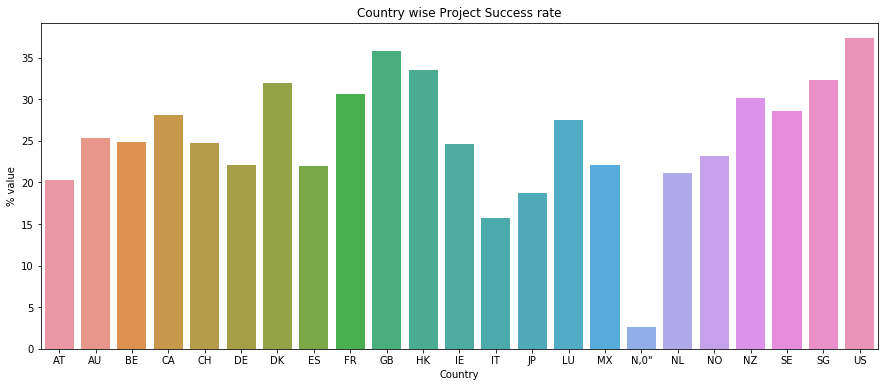

In [47]:
plt.figure(figsize = (15,6))
plt.title('Country wise Project Success rate')
sns.barplot(x = country_success_rate.keys(), y = country_success_rate.values)
plt.xlabel('Country')
plt.ylabel('% value')
plt.show()

- Here again we see, similar to currency, that country wise success rate is pretty much similar and within the range of 20-38%. 


##### Launched Date Analysis

In [48]:
train_X = train_X.assign(launched_year = train_X.launched.apply(lambda x: x.split(" ")[0].split("-")[0]).astype(int))
train_X = train_X.assign(launched_month = train_X.launched.apply(lambda x: x.split(" ")[0].split("-")[1]).astype(int))

In [49]:
# This is used later
all_successful = train_X.loc[train_Y.state == 'successful']

In [50]:
train_X.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month
359919,903624360,Slangster - Global Slang Converter (Canceled),Apps,Technology,USD,2016-04-23,50000.0,2016-03-24 16:29:13,0.0,0,US,0.0,0.0,50000.0,2016,3
318366,691611007,"House of Wax, scented wax dipped stuffed anima...",Crafts,Crafts,USD,2015-02-09,1200.0,2015-01-13 05:08:35,0.0,0,US,0.0,0.0,1200.0,2015,1


In [51]:
yearly_counts = train_X.launched_year.value_counts()

In [52]:
yearly_counts

2015    55774
2014    48709
2016    41240
2017    37485
2013    32206
2012    29632
2011    18921
2010     7591
2009      977
2018       94
1970        6
Name: launched_year, dtype: int64

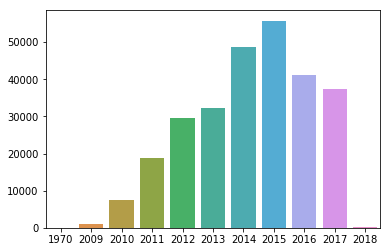

In [53]:
sns.barplot(yearly_counts.keys(),yearly_counts.values)

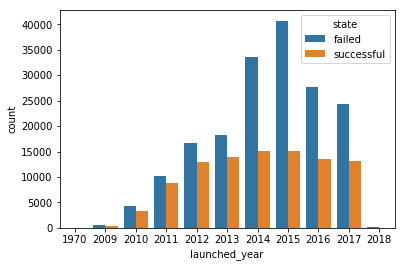

In [54]:
sns.countplot(x = train_X.launched_year, hue = train_Y.state)

- We can see here that the projects launched between 2012 and 2018 have fairly a similar amount of success

In [55]:
groupwise_year_success = all_successful.groupby('launched_year')['ID'].count()

In [56]:
groupwise_year_success

launched_year
2009      434
2010     3340
2011     8806
2012    12860
2013    13915
2014    15200
2015    15083
2016    13523
2017    13185
Name: ID, dtype: int64

In [57]:
groupwise_year_all = train_X.groupby('launched_year')['ID'].count()

In [58]:
groupwise_year_all

launched_year
1970        6
2009      977
2010     7591
2011    18921
2012    29632
2013    32206
2014    48709
2015    55774
2016    41240
2017    37485
2018       94
Name: ID, dtype: int64

In [59]:
year_success_rate = groupwise_year_success/groupwise_year_all*100

In [60]:
year_success_rate

launched_year
1970          NaN
2009    44.421699
2010    43.999473
2011    46.540881
2012    43.399028
2013    43.206235
2014    31.205732
2015    27.043067
2016    32.790980
2017    35.174070
2018          NaN
Name: ID, dtype: float64

In [61]:
year_success_rate = year_success_rate.fillna(0)

In [62]:
year_success_rate

launched_year
1970     0.000000
2009    44.421699
2010    43.999473
2011    46.540881
2012    43.399028
2013    43.206235
2014    31.205732
2015    27.043067
2016    32.790980
2017    35.174070
2018     0.000000
Name: ID, dtype: float64

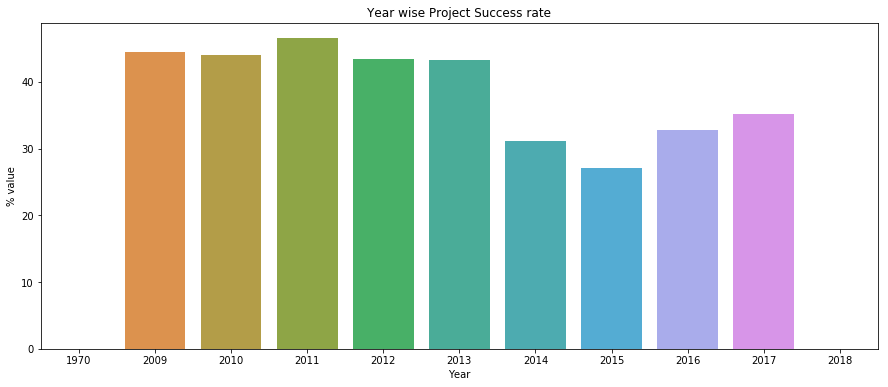

In [63]:
plt.figure(figsize = (15,6))
plt.title('Year wise Project Success rate')
sns.barplot(x = year_success_rate.keys(), y = year_success_rate.values)
plt.xlabel('Year')
plt.ylabel('% value')
plt.show()

- Here we see that launched year does not have a major effect on success rate.
- The projects launched in 1970 and 2018 haven't been successful at all. 

In [64]:
monthly_counts = train_X.launched_month.value_counts()

In [65]:
monthly_counts

7     26146
3     24332
10    24098
11    23798
5     23760
6     23513
4     23183
8     23150
9     22303
2     21494
1     20042
12    16816
Name: launched_month, dtype: int64

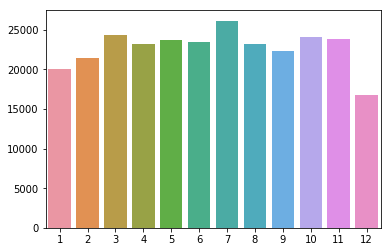

In [66]:
sns.barplot(monthly_counts.keys(),monthly_counts.values)

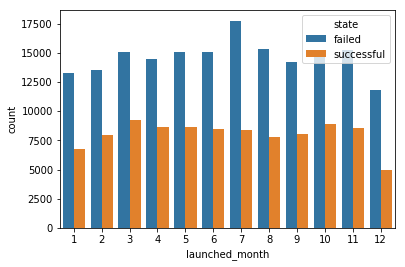

In [67]:
sns.countplot(x = train_X.launched_month, hue = train_Y.state)

In [68]:
groupby_month_success = all_successful.groupby('launched_month')['ID'].count()

In [69]:
groupby_month_all = train_X.groupby('launched_month')['ID'].count()

In [70]:
month_success_rate = groupby_month_success/groupby_month_all*100

In [71]:
month_success_rate

launched_month
1     33.888833
2     36.898669
3     37.876048
4     37.428288
5     36.473064
6     35.903543
7     32.104337
8     33.680346
9     36.143120
10    36.853681
11    35.834944
12    29.501665
Name: ID, dtype: float64

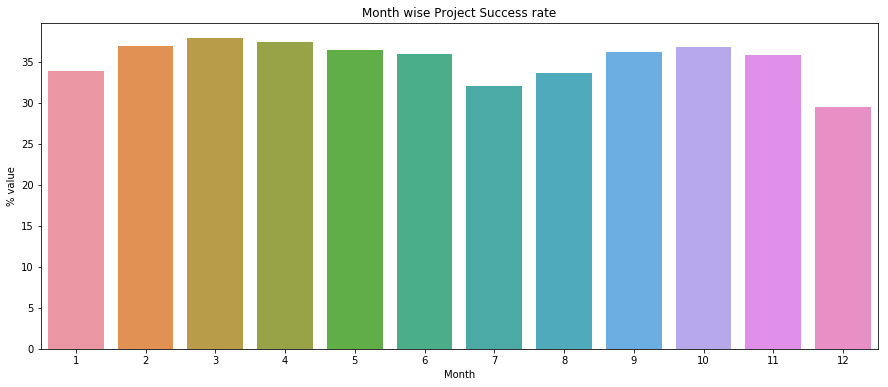

In [72]:
plt.figure(figsize = (15,6))
plt.title('Month wise Project Success rate')
sns.barplot(x = month_success_rate.keys(), y = month_success_rate.values)
plt.xlabel('Month')
plt.ylabel('% value')
plt.show()

- We can see here that the launched month doesn't really have much effect on success of a project, similar to launched year. So launched date is not an important feature to consider in our final set of features.

##### Goal Analysis

In [73]:
country_goal_mean = train_X.groupby('country').usd_goal_real.mean()

In [74]:
country_goal_mean

country
AT       43939.510922
AU       57480.337450
BE       40439.578625
CA       39153.838362
CH      251851.105176
DE       43595.851323
DK       40603.395497
ES       54381.182478
FR       99844.899200
GB       41234.863937
HK       24031.944110
IE       31511.056157
IT       61305.548297
JP       16767.066563
LU       27701.225490
MX       12901.400641
N,0"      4993.265308
NL       51368.918123
NO       58933.990312
NZ       20957.136849
SE       44468.046669
SG       15776.214656
US       42979.461148
Name: usd_goal_real, dtype: float64

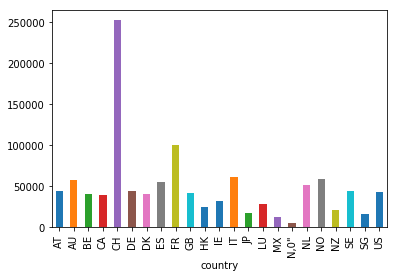

In [75]:
country_goal_mean.plot(kind='bar')

- We can see that China has highest mean for pledge goal. 

##### Pledge analysis

In [76]:
country_pledge_mean = train_X.groupby('country').usd_pledged_real.mean()

In [77]:
country_pledge_mean

country
AT      17934.056501
AU       6157.430395
BE       7489.375765
CA       6050.298958
CH      16822.932921
DE       9655.274530
DK       7764.887793
ES       5609.573205
FR      11932.800660
GB       7215.567072
HK      14190.219772
IE       5389.897776
IT       6304.390289
JP       3035.643750
LU       7773.127451
MX       1446.290088
N,0"     2211.910503
NL       8676.802941
NO       3854.370156
NZ       5271.519726
SE       7792.187644
SG       9675.786005
US       9669.771843
Name: usd_pledged_real, dtype: float64

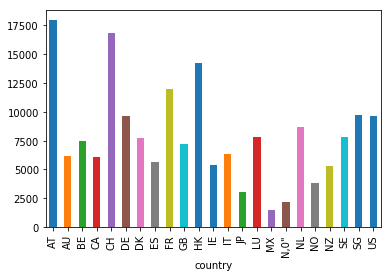

In [78]:
country_pledge_mean.plot(kind = 'bar')

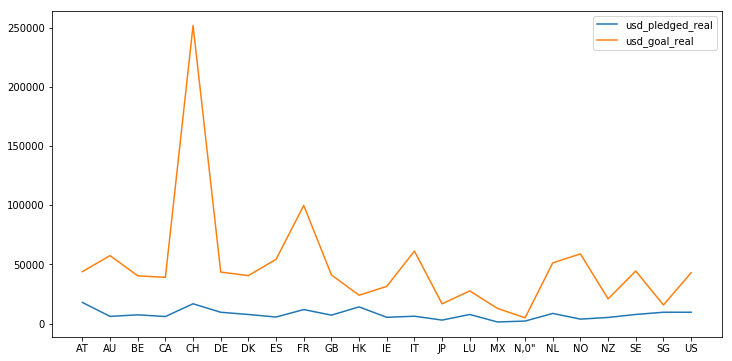

In [79]:
plt.figure(figsize = (12,6))
plt.plot(country_pledge_mean)
plt.plot(country_goal_mean)
plt.legend()

- Here we see that None of the countries are able to meet their avergae pledge.
- Singapore, Hong Kong and Japan have the lowest goal/pledge ratio.

##### Duration Analysis

In [80]:
train_X = train_X.assign(launched_date = train_X.launched.apply(lambda x: x.split(" ")[0]))

In [81]:
start = pd.to_datetime(train_X['launched_date'])
end = pd.to_datetime(train_X['deadline'])
months = ((end-start)/np.timedelta64(1,'M') + 1).astype(int)

In [82]:
train_X = train_X.assign(duration_months = months)

In [83]:
all_successful = train_X.loc[train_Y.state == 'successful']

In [84]:
groupby_duration_success = all_successful.groupby('duration_months')['ID'].count()
groupby_duration_all = train_X.groupby('duration_months')['ID'].count()
duration_success_rate = groupby_duration_success/groupby_duration_all*100

In [85]:
duration_success_rate = duration_success_rate.fillna(0)

In [86]:
duration_success_rate

duration_months
1      36.110739
2      34.033548
3      33.827666
4      31.250000
485     0.000000
488     0.000000
489     0.000000
550     0.000000
Name: ID, dtype: float64

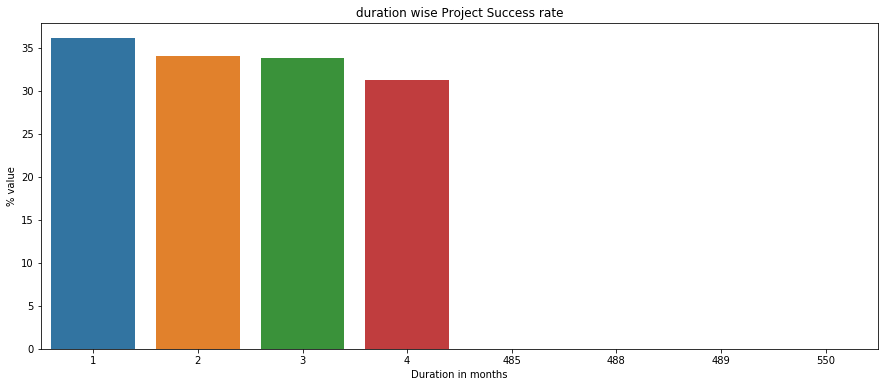

In [87]:
plt.figure(figsize = (15,6))
plt.title('duration wise Project Success rate')
sns.barplot(x = duration_success_rate.keys(), y = duration_success_rate.values)
plt.xlabel('Duration in months')
plt.ylabel('% value')
plt.show()

##### Pledge to Goal ratio

In [88]:
pledge = train_X.usd_pledged_real
goal = train_X.usd_goal_real
ratio = pledge/goal

In [89]:
ratio

359919    0.000000
318366    0.000000
370448    0.296667
154340    0.053668
263982    1.071650
32599     0.000200
102635    0.000400
74410     0.045539
278884    0.002000
328176    0.336520
254193    0.193714
120769    0.002769
185935    1.025000
198518    0.009667
131318    1.053336
374200    1.044000
215201    1.029750
35175     0.025000
134695    0.007222
95986     1.801607
377053    0.000000
216118    1.016666
366824    2.176099
268452    0.120000
265371    0.170000
108771    3.107292
166553    0.046250
215503    0.011999
361738    1.178400
231920    0.013839
            ...   
176091    0.079000
336775    2.193141
90620     0.000000
58933     0.000833
365036    0.000000
330935    0.370386
201887    0.465232
239284    2.602000
69385     0.060001
189642    0.005202
361186    1.155795
260919    1.473334
21288     1.095000
2486      0.047272
24030     1.061500
51294     0.007500
283666    1.095533
356782    0.000100
145040    0.035667
22902     0.014923
135692    1.021333
322088    0.

In [90]:
train_X = train_X.assign(pledge_goal_ratio = ratio)

<b> So after the exploratory analysis, my feature set will consist of:  category, main category, duration_months, usd_goal_real, usd_pledged_real, pledge_goal_ratio, backers and country </b>

### Encoding Features

In [91]:
train_X.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,launched_date,duration_months,pledge_goal_ratio
359919,903624360,Slangster - Global Slang Converter (Canceled),Apps,Technology,USD,2016-04-23,50000.0,2016-03-24 16:29:13,0.0,0,US,0.00,0.00,50000.00,2016,3,2016-03-24,1,0.000000
318366,691611007,"House of Wax, scented wax dipped stuffed anima...",Crafts,Crafts,USD,2015-02-09,1200.0,2015-01-13 05:08:35,0.0,0,US,0.00,0.00,1200.00,2015,1,2015-01-13,1,0.000000
370448,957512628,ZDS : Zombie Defense Simulation,Video Games,Games,USD,2015-12-18,300.0,2015-11-18 01:25:02,89.0,16,US,89.00,89.00,300.00,2015,11,2015-11-18,1,0.296667
154340,1784679909,EDC Snowflake Spinner,Textiles,Art,CAD,2017-04-09,3000.0,2017-03-10 21:59:41,161.0,3,CA,233.40,121.65,2266.72,2017,3,2017-03-10,1,0.053668
263982,412532783,Bowery & Fourth - Business wear for the Urban ...,Ready-to-wear,Fashion,DKK,2015-12-11,100000.0,2015-10-28 14:42:56,107165.0,106,DK,15882.14,15728.10,14676.53,2015,10,2015-10-28,2,1.071650


In [92]:
from sklearn import preprocessing

In [93]:
# To prepare the validation and test dataframe
def prepare_dataset(dataframe):
    
    # Adding duration_months
    start = pd.to_datetime(dataframe['launched'].apply(lambda x: x.split(" ")[0]))
    end = pd.to_datetime(dataframe['deadline'])
    months = ((end-start)/np.timedelta64(1,'M') + 1).astype(int)
    dataframe = dataframe.assign(duration_months = months)
    
    # Adding pledge_goal_ratio
    
    pledge = dataframe.usd_pledged_real
    goal = dataframe.usd_goal_real
    ratio = pledge/goal
    dataframe = dataframe.assign(pledge_goal_ratio = ratio)
    
    return dataframe

In [94]:
features = ['category','main_category','duration_months','usd_goal_real','usd_pledged_real','pledge_goal_ratio','backers','country']

In [95]:
features

['category',
 'main_category',
 'duration_months',
 'usd_goal_real',
 'usd_pledged_real',
 'pledge_goal_ratio',
 'backers',
 'country']

In [99]:
# Getting only the required columns for our table

def get_features(dataframe):
    
    new_df = dataframe.loc[:,features]
    return new_df

In [96]:
def encode_features(dataframe):
    for f in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataframe[f])
        dataframe[f] = le.transform(dataframe[f])
    return dataframe

In [97]:
train_X = encode_features(train_X)

In [98]:
train_X.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,launched_date,duration_months,pledge_goal_ratio
359919,903624360,Slangster - Global Slang Converter (Canceled),8,13,USD,2016-04-23,50000.0,2016-03-24 16:29:13,0.0,0,22,0.0,0,34474,2016,3,2016-03-24,0,0
318366,691611007,"House of Wax, scented wax dipped stuffed anima...",32,2,USD,2015-02-09,1200.0,2015-01-13 05:08:35,0.0,0,22,0.0,0,7774,2015,1,2015-01-13,0,0


In [100]:
train_X = get_features(train_X)

In [101]:
train_X.head()

,category,main_category,duration_months,usd_goal_real,usd_pledged_real,pledge_goal_ratio,backers,country
359919,8,13,0,34474,0,0,0,22
318366,32,2,0,7774,0,0,0,22
370448,148,8,0,2380,5323,54086,16,22
154340,140,0,0,11261,6553,30343,3,3
263982,121,5,1,26268,59867,80483,106,6


## Training and Predictions

###### Hyperparameter optimization is done on Validation Set. So preparing the validation set

In [102]:
val_X.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real
172929,1879532680,appsolutely fun for everyone,Apps,Technology,CAD,2017-03-16,25000.0,2017-02-14 22:57:23,0.0,0,CA,0.00,0.00,18775.82
79206,1402933213,Recording and release of new single,Rock,Music,GBP,2016-07-24,600.0,2016-07-06 15:31:09,107.0,6,GB,47.71,140.89,790.02


In [103]:
val_X = prepare_dataset(val_X)
val_X = get_features(val_X)
val_X = encode_features(val_X)

In [104]:
val_X.head(2)

,category,main_category,duration_months,usd_goal_real,usd_pledged_real,pledge_goal_ratio,backers,country
172929,8,13,0,10532,0,0,0,3
79206,125,10,0,2017,2954,14265,6,9


In [105]:
sample_len = int(.05*len(val_X)) # Taking only 2% of data for setting hyperparameters
sample_X = val_X[:sample_len]
sample_Y = val_Y[:sample_len]

In [106]:
print(sample_X.shape)
print(sample_Y.shape)

(3407, 8)
(3407, 1)


In [107]:
sample_X.head()

,category,main_category,duration_months,usd_goal_real,usd_pledged_real,pledge_goal_ratio,backers,country
172929,8,13,0,10532,0,0,0,3
79206,125,10,0,2017,2954,14265,6,9
258916,42,10,0,1550,4826,19709,19,22
40936,72,10,1,10713,0,0,0,22
337613,90,10,0,10409,22364,25245,139,22


In [108]:
sample_Y.head()

,state
172929,failed
79206,failed
258916,failed
40936,failed
337613,successful


In [109]:
# Prepare test data

test_X = prepare_dataset(test_X)
test_X = get_features(test_X)
test_X = encode_features(test_X)

### Random Forest Classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [111]:
clf = RandomForestClassifier()

In [112]:
score = make_scorer(accuracy_score)

In [113]:
param_grid = {'n_estimators':[3,5,7,9],
                  'criterion' : ['gini','entropy'],
                  'max_features': ['log2','auto','sqrt'],
                  'max_depth' : [1,3,7],
                  'min_samples_split':[2,3,5]
                 }

In [114]:
grid = GridSearchCV(clf,param_grid,score)

In [115]:
grid = grid.fit(sample_X,sample_Y.squeeze())

In [116]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [117]:
clf = grid.best_estimator_

In [118]:
clf.fit(val_X,val_Y.squeeze())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
predictions = clf.predict(val_X)
print(accuracy_score(val_Y,predictions))

0.99568655643422


In [120]:
# Training on train data

clf.fit(train_X,train_Y.squeeze())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [121]:
predictions = clf.predict(test_X)

In [122]:
accuracy = accuracy_score(test_Y,predictions)

In [123]:
print(f'The Random Forest Classifier gives the accuracy of {accuracy*100:.2f}% on the test set')

The Random Forest Classifier gives the accuracy of 64.54% on the test set


### Logistic Regression Classifier

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
clf_lr = LogisticRegression()

In [126]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000]}

In [127]:
grid_lr = GridSearchCV(clf_lr,param_grid,score)

In [128]:
grid_lr = grid_lr.fit(sample_X,sample_Y.squeeze())

In [129]:
grid_lr.best_estimator_

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [130]:
clf_lr = grid_lr.best_estimator_

In [131]:
clf_lr.fit(val_X,val_Y.squeeze())

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
predictions = clf_lr.predict(val_X)
print(accuracy_score(val_Y,predictions))

0.9814404554057424


In [133]:
# Training on the training data
clf_lr.fit(train_X,train_Y.squeeze())

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
predictions = clf_lr.predict(test_X)
accuracy = accuracy_score(test_Y,predictions)

In [135]:
print(f'The Logistic Regression Classifier gives the accuracy of {accuracy*100:.2f}% on the test set')

The Logistic Regression Classifier gives the accuracy of 97.82% on the test set


### SVM Classifier

In [136]:
from sklearn.svm import SVC

In [137]:
clf_svm = SVC()

In [138]:
param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000],
              'gamma' : [0.001,0.01,0.1,1]
             }

In [139]:
grid_svm = GridSearchCV(clf_svm,param_grid,score)

In [140]:
grid_svm = grid_svm.fit(sample_X,sample_Y.squeeze())

In [141]:
grid_svm.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [142]:
clf_svm = grid_svm.best_estimator_

In [143]:
clf_svm.fit(val_X,val_Y.squeeze())

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [144]:
predictions = clf_svm.predict(val_X)

In [145]:
print(accuracy_score(val_Y,predictions))

0.9998532842324565


In [146]:
# Training on the training data
clf_svm.fit(train_X,train_Y.squeeze())

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [147]:
predictions = clf_svm.predict(test_X)
accuracy = accuracy_score(test_Y,predictions)

In [148]:
print(f'The SVM Classifier gives the accuracy of {accuracy*100:.2f}% on the test set')

The SVM Classifier gives the accuracy of 64.54% on the test set


<b> So, the Random Forest Classifier gives an accuracy of 64.54% on the test set. <br>
    The Logistic Regression Classifier gives an accuracy of 97.82% on the test set. <br>
    The SVM classifier gives an accuracy of 64.54% on the test set.<br>
    <br>
    Since the Logistic Regression Classifier performs the best on the test set, the final model that I use is the Logistic regression model. </b>



In [149]:
import pickle

In [150]:
# Saving the trained model.

file_name = 'final_model_lr.pkl'
pickle.dump(clf_lr,open(file_name,'wb'))

In [151]:
# Checking the predictions by loading the model.

new_model = pickle.load(open(file_name,'rb'))

In [154]:
predictions = new_model.predict(test_X)

In [155]:
print(accuracy_score(test_Y,predictions))

0.9782396281722873
